[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/deep-learning/anns/iris_regression.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# Perceptron neural network for regression
In this notebook, we will use a simple [Perceptron Neural Network](https://en.wikipedia.org/wiki/Perceptron) for regression.

## Iris dataset
The [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a well-known dataset in the field of machine learning and statistics. It was introduced by the British biologist and statistician Ronald A. Fisher in 1936. The dataset consists of measurements of various features of iris flowers belonging to three different species: **setosa**, **versicolor**, and **virginica**.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/330px-Iris_versicolor_3.jpg" alt="Iris">

The four features (attributes) measured for each flower are:

1. **Sepal Length**: Length of the sepal (the outermost petal whorl) in centimeters.
2. **Sepal Width**: Width of the sepal in centimeters.
3. **Petal Length**: Length of the petal (the innermost petal whorl) in centimeters.
4. **Petal Width**: Width of the petal in centimeters.

The Iris dataset is commonly used for practicing classification algorithms, as the goal is often to classify iris flowers into one of the three species based on their feature measurements.

## Objective

The objective of this notebook is to create a single Perceptron NN as a regression model to predict *Sepal Length* from the other three numerical features. Our neural network will follow the next architecture (with 3 inputs):

<img src="img/iris_regression.png" width="600px"/>

In [181]:
# make sure the required packages are installed
%pip install pandas numpy seaborn matplotlib scikit-learn keras tensorflow --quiet
# if running in colab, install the required packages and copy the necessary files
directory='data-science-course/deep-learning/anns'
if get_ipython().__class__.__module__.startswith('google.colab'):
    !git clone https://github.com/francisco-ortin/data-science-course.git  2>/dev/null
    !cp --update {directory}/*.py .
    !mkdir -p img data
    !cp {directory}/img/* img/.

from keras.src.layers import Dense
from keras.src.optimizers import SGD
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential

from utils import show_distribution, show_loss

Note: you may need to restart the kernel to use updated packages.


## Data preparation
The iris dataset is loaded from scikit-learn:

In [182]:
# Load Iris Data
iris = load_iris()
# Creating pd DataFrames
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


Let's show the distribution of the four features:

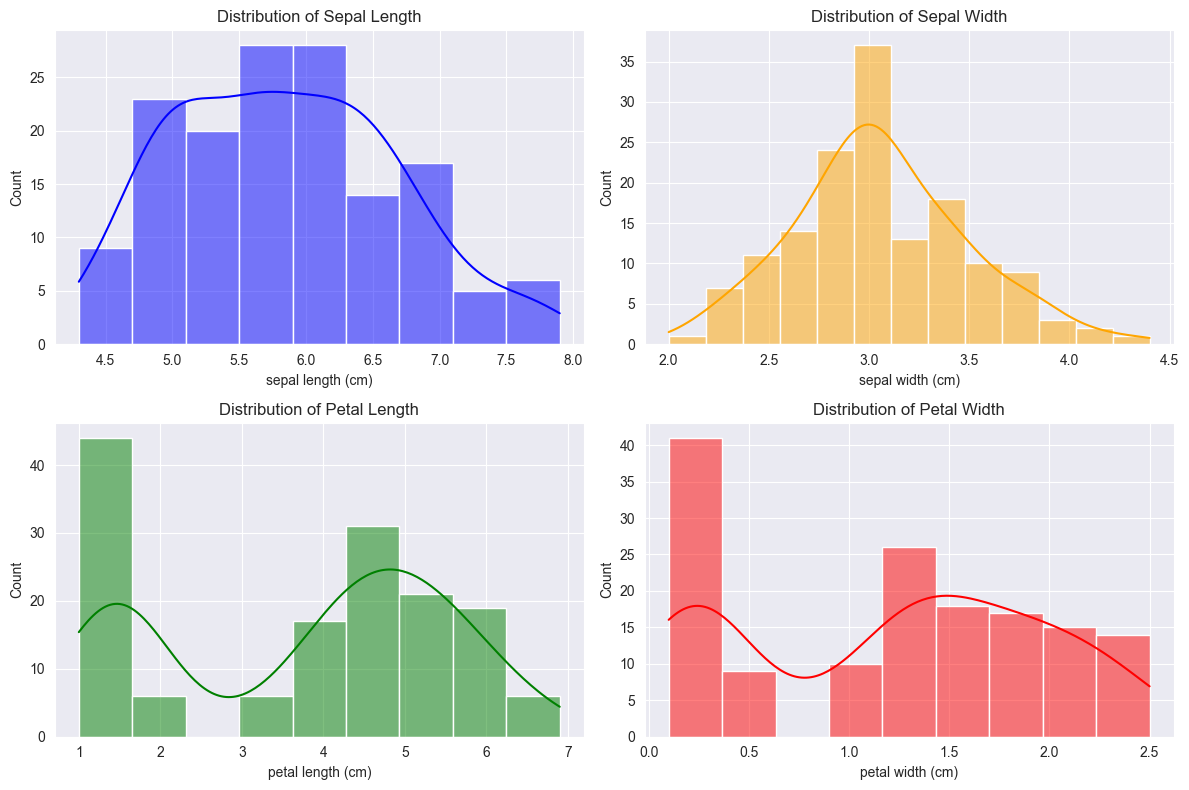

In [183]:
show_distribution(iris_df)

X is the dataset without the target variable (sepal length). y is sepal length.

In [184]:
X = iris_df.drop(labels= 'sepal length (cm)', axis= 1)
y = iris_df['sepal length (cm)']

We split the dataset in 80% train and 20% test.

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Neural network
A simple neuron is created with 3 inputs and 1 output. 
- The `Sequential` class allows creating a neural network by stacking layers. In this example, we only use one layer. 
- No activation function is required (i.e., `linear`). 
- Model.`summary()` shows that the network has one single neuron with 4 parameters: 3 input weights + the bias (`b`). 
- All the parameters all trainable (learned) from data.

In [186]:
model = Sequential()  # the (initially empty) artificial neural network
model.add(Dense(1, input_dim=3, activation='linear'))  # 'linear' = no activation
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model compilation

Once the ANN has been built, we need to compile it. Compilation involves configuring the learning process before training the model. This step is essential for setting up various parameters that define how the model will learn. Usually:
- Optimizer: the algorithm used to update the model parameters (weights and biases) during training.
- Loss function or cost function used upon training.
- Metrics are used to evaluate the performance of the model during training and testing. By default, just the loss function is used.

We will use MSE as the loss function, since we are building a regression model. For optimization, we use Stochastic Gradient Descent (SGD). We want to be prompted MSE and Mean Absolute Error metrics. 

In [187]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['mean_squared_error', 'mean_absolute_error'])
initial_weights = model.get_weights()  # store the initial weights

## Model training

We now train the model (learn the parameters) wit `fit` for 10 epochs. An *epoch* is one complete pass through the entire training dataset during the training phase. During each epoch, the neural network's parameters (weights and biases) are adjusted based on the error or loss calculated on the training data. 

In [188]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 2.3314 - mean_squared_error: 2.3314 - mean_absolute_error: 1.1282
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2701 - mean_squared_error: 0.2701 - mean_absolute_error: 0.4405
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2357 - mean_squared_error: 0.2357 - mean_absolute_error: 0.4047
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.2121 - mean_squared_error: 0.2121 - mean_absolute_error: 0.3853
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 0.1987 - mean_squared_error: 0.1987 - mean_absolute_error: 0.3712
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1850 - mean_squared_error: 0.1850 - mean_absolute_error: 0.3574
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1783 - mean_squared_error: 0.1783 - mean_absolute_error: 0.3487
Epoch 8/10
4/4 [==============================] 

Let's plot the training loss (MSE) and MAE:

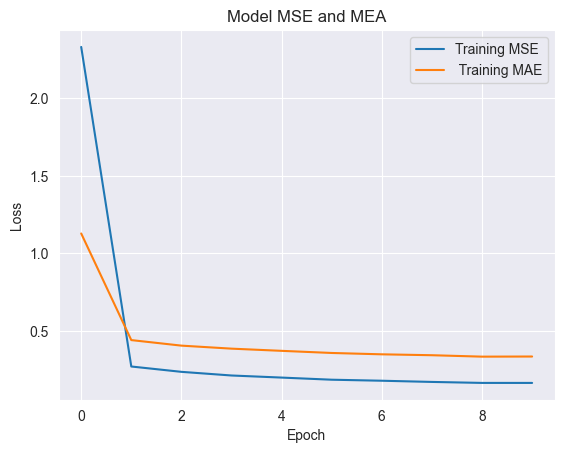

In [189]:
show_loss(history)

## Prediction

We take the first iris from the test set and `predict` its value. Then, we compare its predicted value with the actual one.

In [190]:
prediction = model.predict(X_test.iloc[:1], verbose=0)  # A matrix with the first sample
print(f"Prediction for the first iris in test: {prediction[0][0]}. Actual value: {y_test.iloc[0]}")

Prediction for the first iris in test: 6.1803741455078125. Actual value: 5.4


## Assessment

We take the whole test dataset and evaluate the performance of the model. We measure Mean Squared Error and Mean Absolute Error.

In [191]:
prediction = model.predict(X_test, verbose=0)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, prediction):.4f}.")
print(f"Mean Squared Error: {mean_squared_error(y_test, prediction):.4f}.")

Mean Absolute Error: 0.3814.
Mean Squared Error: 0.2034.


## ✨ Questions ✨ 

1. What do you think it will happen if you increase the number of epochs from 10 to 20? Try it out.
2. Do you think I would matter if you reset the network's weights or not (cell below)? Try it out.
3. What do you think it will happen if you increase the number of epochs to 100? Try it out.
4. Do you think the error will always decrease with increasing the number of epochs?

In [192]:
model.set_weights(initial_weights)

### Answers

*Write your answers here.*
